In [25]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [26]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180816_3_zipf2a_7.pcap', type='accumulate.txt', window_size=500, k=10):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir, type)    
                cnt = 0
                with open(full_path, 'r') as f:
                    for line in f:
                        num_str = re.match(r'\(srcIP = +(\d+\.\d+\.\d+\.\d+)\) +(.+)', line).group(2)
                        num_list = [int(num) for num in num_str.split()]
                        # print(num_list)
                        res.append(num_list)
                        cnt += 1
                        if cnt >= k:
                            break
        
        res_sum = [sum(col) for col in zip(*res)]
            
    return res, res_sum
    # return res_sum

read_data()

([[0,
   445,
   887,
   1350,
   1721,
   2701,
   2923,
   4000,
   15027,
   17464,
   19640,
   23936,
   24659,
   28794,
   29554,
   30682,
   31275,
   32523,
   34326,
   35896,
   38170],
  [0,
   667,
   863,
   1219,
   1294,
   1631,
   1873,
   3586,
   5080,
   6427,
   8421,
   9925,
   11437,
   13231,
   14668,
   16077,
   17894,
   19158,
   20883,
   22456,
   24044],
  [0,
   205,
   563,
   1058,
   1381,
   1730,
   2301,
   3132,
   4199,
   4833,
   5412,
   6385,
   7990,
   9429,
   11710,
   12858,
   14237,
   15989,
   17894,
   19936,
   20913],
  [0,
   35,
   68,
   103,
   126,
   147,
   175,
   586,
   1417,
   5207,
   7662,
   8284,
   11722,
   13221,
   13645,
   14603,
   14605,
   14609,
   17367,
   17371,
   17375],
  [0,
   235,
   500,
   751,
   998,
   1254,
   1478,
   2643,
   3830,
   4984,
   6140,
   7273,
   8104,
   9153,
   10329,
   11447,
   12541,
   13644,
   14798,
   15888,
   16819],
  [0,
   3014,
   5358,
   8584,
   113

In [35]:
def read_sum_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "summation_" + str(window_size)
                final_full_path = os.path.join(path, dir, window_dir, "final_topk_summation.txt")    
                dynamic_full_path = os.path.join(path, dir, window_dir, "dynamic_topk_summation.txt")    
                
                with open(final_full_path, 'r') as f:
                    line = f.readline().strip()
                    final_list = [int(num) for num in line.split()]
                    res.append(final_list)
                    
                with open(dynamic_full_path, 'r') as f:
                    line = f.readline().strip()
                    dynamic_list = [int(num) for num in line.split()]
                    res.append(dynamic_list)
            
    return res

read_sum_data()

[[0,
  579,
  894,
  1540,
  8082,
  12126,
  12572,
  14148,
  15550,
  16223,
  16776,
  19461,
  20814,
  21318,
  21603,
  21842,
  27871,
  35234,
  38995,
  44254,
  48001,
  52558,
  58272,
  63383,
  68789,
  74036,
  79438,
  85557,
  92794,
  100335,
  108091,
  115033,
  121826,
  128385,
  135535,
  144025,
  152362,
  159850,
  166104,
  171228,
  179006,
  184490,
  190197,
  195809,
  202401,
  208521,
  212826,
  218524,
  222729],
 [0,
  5698,
  9691,
  15031,
  25251,
  32747,
  38690,
  43430,
  49375,
  54967,
  59126,
  66336,
  71300,
  74753,
  78125,
  84680,
  84852,
  88002,
  90709,
  93679,
  93807,
  94990,
  96088,
  96994,
  98401,
  101035,
  102196,
  105029,
  108071,
  113030,
  118567,
  124214,
  129590,
  135342,
  141842,
  149514,
  157145,
  163341,
  168270,
  173199,
  180426,
  184944,
  190197,
  195809,
  202401,
  208521,
  212826,
  218524,
  222729]]

In [47]:
## parameters

name1 = ["zipf2a", "zipf4", "zipf2b"]
name2 = ["caida20180816", "caida20180517"]

lens = [["3", "7"],
        ["4", "6"],
        ["5", "5"],
        ["6", "4"],
        ["7", "3"],
        ["8", "2"],]

pcap_file = []


# # caida + caida
# for l in lens:
#     name = f'{name2[0]}_{l[0]}_{name2[1]}_{l[1]}.pcap'
#     pcap_file.append(name)

    
# single dataset
pcap_file.append("caida20180517_10_caida20180816_0.pcap")
pcap_file.append("caida20180816_10_caida20180816_0.pcap")
pcap_file.append("zipf2a_10_caida20180816_0.pcap") 
pcap_file.append("zipf2b_10_caida20180816_0.pcap") 
pcap_file.append("zipf4_10_caida20180816_0.pcap")


# # caida + zipf
# for n1 in name1:
#     for l in lens:
#         name = f'{name2[0]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)


# # zipf + caida
# for n1 in name1:
#     for n2 in name2:
#         for l in lens:
#             name = f'{n1}_{l[0]}_{n2}_{l[1]}.pcap'
#             pcap_file.append(name)

print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]



['caida20180517_10_caida20180816_0.pcap', 'caida20180816_10_caida20180816_0.pcap', 'zipf2a_10_caida20180816_0.pcap', 'zipf2b_10_caida20180816_0.pcap', 'zipf4_10_caida20180816_0.pcap']
Total Pcap File Number: 5


### Predict Only Final TopK

In [29]:
def changing_time_predict_final_topk(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], type_="accumulate.txt", window_size=200, k=10):
    
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            res_sec_var[name] = [None, None]
            
            _, result_sum = read_data(algo, row, w, level, seed, count, flowkey, epochs, d, type_, window_size, k)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            
            res_sum[name] = result_sum
            for i in range(1, len(result_sum)):
                res_var[name].append(result_sum[i] - result_sum[i-1])
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    pred = []
    for i in range(len(label)):
        var_max = max(res_var[label[i]][1:])
        var_avg = sum(res_var[label[i]][1:]) / len(res_var[label[i]][1:])
        var_diff = var_max - var_avg
        # print(var_max, var_avg, var_diff)
        max_idx = 2
        max_val = -1
        for j in range(2, len(res_sec_var[label[i]])):
            if res_sec_var[label[i]][j] > max_val:
                max_val = res_sec_var[label[i]][j] 
                max_idx = j
                
        pred.append((max_idx-1)*window_size/1000)
        
        print(i)
        print(label[i])
        print(var_max, var_avg, var_diff)
        print(max(res_sec_var[label[i]][2:]), sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:]), max(res_sec_var[label[i]][2:]) - (sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:])))
        print(pred[i], answer[i])
        print()
        # else:
        #     pred.append(0)
            
            
    # for i in range(len(answer)):
    #     print(f'{label[i]}: pred - {pred[i]}, true - {answer[i]} ==> diff - {pred[i] - answer[i]}')
            
    
    
    
changing_time_predict_final_topk(width=widths, datasets=pcap_file)


0
zipf2a_3_caida20180816_7_4096
8081 3834.44 4246.5599999999995
5551 1277.8979591836735 4273.102040816327
0.6 3

1
zipf2a_4_caida20180816_6_4096
9093 3765.24 5327.76
5732 1301.9183673469388 4430.081632653061
0.6 4

2
zipf2a_5_caida20180816_5_4096
9545 3627.96 5917.04
5724 1212.4285714285713 4511.571428571428
0.6 5

3
zipf2a_6_caida20180816_4_4096
10601 3792.08 6808.92
6547 994.5510204081633 5552.448979591837
0.6 6

4
zipf2a_7_caida20180816_3_4096
10601 3863.96 6737.04
6547 974.9387755102041 5572.061224489796
0.6 7

5
zipf2a_8_caida20180816_2_4096
10743 4013.36 6729.639999999999
5764 1046.6122448979593 4717.3877551020405
0.6 8

6
zipf2a_3_caida20180517_7_4096
8490 4640.1875 3849.8125
5896 1202.127659574468 4693.8723404255325
0.6 3

7
zipf2a_4_caida20180517_6_4096
8489 4136.708333333333 4352.291666666667
5896 1225.723404255319 4670.276595744681
0.6 4

8
zipf2a_5_caida20180517_5_4096
9521 3763.6458333333335 5757.354166666666
7286 1283.1914893617022 6002.808510638298
5.0 5

9
zipf2a_6_caid

In [30]:
def plot_single_final_topk(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', type_="accumulate.txt", window_size=500, k=10):
    
    labels = [i for i in range(10)]
    res = []

    result, result_sum = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type_, window_size, k)
    
    for r in result:
        res.append(r)
    
    result_var = [None]
    for i in range(1, len(result_sum)):
        result_var.append(result_sum[i] - result_sum[i-1])
        
    result_sec_var = [None, None]
    for i in range(2, len(result_var)):
        result_sec_var.append(abs(result_var[i] - result_var[i-1]))
        
    labels.append("TopK_sum")
    # labels.append("TopK_var")
    labels.append("TopK_sec_var")
    res.append(result_sum)
    # res.append(result_var)
    res.append(result_sec_var)
    
            
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    print(labels, len(labels))
    print(res, len(res))
    print(result_var, len(result_var))
    print(result_sec_var, len(result_sec_var))
    print(f'max: {max(result_var[1:])}, avg: {sum(result_var[1:])/len(result_var[1:])}, diff: {max(result_var[1:]) - (sum(result_var[1:])/len(result_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    print(dataset)
    for i in range(len(res)):
        if i == len(res)-2:
            plt.plot(res[i], label=labels[i], c="red")
        elif i == len(res)-1:
            plt.plot(res[i], label=labels[i], c="black")
        else:
            plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window - %s (Window Size = %d)' % (dataset, type_, window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
# datasets = ["caida20180816_8_zipf2a_2.pcap"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
plot_single(dataset=pcap_file[30], type_="accumulate.txt", window_size=window_sizes[0])
# plot_single(dataset=datasets[1], type_="accumulate.txt")
# plot_single(type_="variation.txt")
# plot_single(type_="second_variation.txt")

NameError: name 'plot_single' is not defined

### Plot Both Final & Dynamic TopK

In [48]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    res_sum2 = {}
    res_var2 = {}
    res_sec_var2 = {}
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            res_var2[name] = [None]
            res_sec_var[name] = [None, None]
            res_sec_var2[name] = [None, None]
            
            res = read_sum_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            
            res_sum[name] = res[0]
            res_sum2[name] = res[1]
            
            for i in range(1, len(res[0])):
                res_var[name].append(res[0][i] - res[0][i-1])
                res_var2[name].append(res[1][i] - res[1][i-1])
                
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
                res_sec_var2[name].append(abs(res_var2[name][i] - res_var2[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    pred = []
    pred2 = []
    for i in range(len(label)):
        # final
        var_max = max(res_var[label[i]][1:])
        var_avg = sum(res_var[label[i]][1:]) / len(res_var[label[i]][1:])
        var_diff = var_max - var_avg
        # print(var_max, var_avg, var_diff)
        max_idx = 2
        max_val = -1
        for j in range(2, len(res_sec_var[label[i]])):
            if res_sec_var[label[i]][j] > max_val:
                max_val = res_sec_var[label[i]][j] 
                max_idx = j
                
        pred.append((max_idx-1)*window_size/1000)
        
        # dynamic
        var_max2 = max(res_var2[label[i]][1:])
        var_avg2 = sum(res_var2[label[i]][1:]) / len(res_var2[label[i]][1:])
        var_diff2 = var_max2 - var_avg2
        # print(var_max, var_avg, var_diff)
        max_idx2 = 2
        max_val2 = -1
        for j in range(2, len(res_sec_var2[label[i]])):
            if res_sec_var2[label[i]][j] > max_val2:
                max_val2 = res_sec_var2[label[i]][j] 
                max_idx2 = j
                
        pred2.append((max_idx2-1)*window_size/1000)
        
        print(i)
        print(label[i])
        print('\tFinal TopK')
        print('\t\t', var_max, var_avg, var_diff)
        print('\t\t', max(res_sec_var[label[i]][2:]), sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:]), max(res_sec_var[label[i]][2:]) - (sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:])))
        print('\t\t', pred[i], answer[i])
        print('\tDynamic TopK')
        print('\t\t', var_max2, var_avg2, var_diff2)
        print('\t\t', max(res_sec_var2[label[i]][2:]), sum(res_sec_var2[label[i]][2:]) / len(res_sec_var2[label[i]][2:]), max(res_sec_var2[label[i]][2:]) - (sum(res_sec_var2[label[i]][2:]) / len(res_sec_var2[label[i]][2:])))
        print('\t\t', pred2[i], answer[i])
        print()
        
predict(width=widths, datasets=pcap_file)

0
caida20180517_10_caida20180816_0_4096
	Final TopK
		 8916 6408.895833333333 2507.104166666667
		 4505 1208.3191489361702 3296.68085106383
		 8.8 10
	Dynamic TopK
		 14869 6408.895833333333 8460.104166666668
		 6053 1325.9787234042553 4727.021276595745
		 0.2 10

1
caida20180816_10_caida20180816_0_4096
	Final TopK
		 8833 4912.82 3920.1800000000003
		 3545 1143.9183673469388 2401.081632653061
		 8.4 10
	Dynamic TopK
		 8284 4912.82 3371.1800000000003
		 3113 1044.0204081632653 2068.9795918367345
		 0.4 10

2
zipf2a_10_caida20180816_0_4096
	Final TopK
		 10208 4699.96 5508.04
		 4907 1143.4897959183672 3763.5102040816328
		 0.6 10
	Dynamic TopK
		 10220 4699.96 5520.04
		 4880 1190.4489795918366 3689.5510204081634
		 0.6 10

3
zipf2b_10_caida20180816_0_4096
	Final TopK
		 9923 7129.96 2793.04
		 4160 1214.3469387755101 2945.6530612244896
		 3.2 10
	Dynamic TopK
		 10096 7129.96 2966.04
		 4285 1245.061224489796 3039.9387755102043
		 3.2 10

4
zipf4_10_caida20180816_0_4096
	Final TopK
	

['Final TopK Sum', 'Dynamic TopK Sum', 'Final TopK Sec Var', 'Dynamic TopK Sec Var'] 4
[[0, 1332, 2717, 4184, 5839, 7137, 9103, 10651, 11481, 12990, 14488, 15492, 17417, 18325, 19417, 20364, 21267, 22142, 23229, 24647, 26074, 28150, 29465, 31437, 33379, 35106, 36961, 38720, 39988, 41916, 43559, 44873, 46561, 47978, 49259, 50210, 51009, 51583, 52166, 52915, 54658, 55830, 57232, 58551, 60167, 61942, 63417, 64687, 65612, 66925, 67647], [0, 2022, 3673, 4893, 6434, 7718, 9577, 11106, 11895, 14268, 16135, 17044, 18647, 19365, 20355, 21191, 22043, 22773, 23857, 25198, 26628, 28770, 30151, 32165, 34051, 35620, 37132, 38824, 40151, 42037, 43717, 45017, 46745, 48078, 49370, 50279, 51045, 51604, 52172, 52947, 54658, 55830, 57232, 58551, 60167, 61942, 63417, 64687, 65612, 66925, 67647], [None, None, 53, 82, 188, 357, 668, 418, 718, 679, 11, 494, 921, 1017, 184, 145, 44, 28, 212, 331, 9, 649, 761, 657, 30, 215, 128, 96, 491, 660, 285, 329, 374, 271, 136, 330, 152, 225, 9, 166, 994, 571, 230, 83, 29

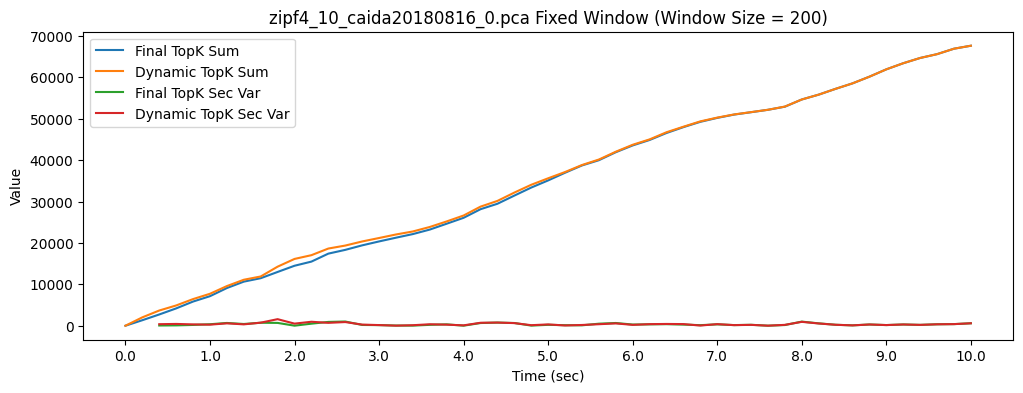

In [51]:
def plot_single_both(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]

    # sum
    res= read_sum_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # variation
    fin_res_var = [None]
    dyn_res_var = [None]
    for i in range(1, len(res[0])):
        fin_res_var.append(res[0][i] - res[0][i-1])
        dyn_res_var.append(res[1][i] - res[1][i-1])
        
    # res.append(fin_res_var)
    # res.append(dyn_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    dyn_sec_res_var = [None, None]
    for i in range(2, len(res[0])):
        fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        dyn_sec_res_var.append(abs(dyn_res_var[i] - dyn_res_var[i-1]))
        
    res.append(fin_sec_res_var)
    res.append(dyn_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(fin_sec_res_var, len(res))
    print(dyn_sec_res_var, len(res))
    print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    print(f'max: {max(dyn_res_var[1:])}, avg: {sum(dyn_res_var[1:])/len(dyn_res_var[1:])}, diff: {max(dyn_res_var[1:]) - (sum(dyn_res_var[1:])/len(dyn_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window (Window Size = %d)' % (dataset[:-1], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)